# $\mathrm{La_4Ni_3O_{8}}$ soft x-ray spectroscopy measurements

- Data collected in the SEXTANTS beamline of the SOLEIL synchrotron.
- Sample at 25 K, except for temperature dependence shown in the end.
- RIXS energy resolution ~ 400 meV.
- Horizontal scattering geometry with $\theta_i$ = 15 degrees and $2\theta$ = 95 degrees.

<img src="geometry.png" width=300 height=394 />

###  Load packages and data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from ticks import add_minor_ticks
from glob import glob
import numpy as np
from pandas import DataFrame
from itertools import product

#### 25 K RIXS maps

In [2]:
sig = {}
pi = {}
for pol, label in zip([sig, pi], ["sigma", "pi"]):
    files = glob(f"data/La4Ni3O8*{label}*eV.dat")
    files.sort(key = lambda x: float(
            x.split(f"{label}_")[-1].split("eV")[0].replace("p", ".")
        )
    )
    pol["l3map"] = dict(ein = [], eloss = [], rixs = [])
    pol["l2map"] = dict(ein = [], eloss = [], rixs = [])
    for fname in files:
        energy = np.around(
            float(
                fname.split(f"{label}_")[-1].split("eV")[0].replace("p", ".")
            ),
            decimals=1
        )
        pol[energy] = np.loadtxt(fname)

        edge = "l3map" if energy < 865 else "l2map"
        pol[edge]["ein"].append(energy)
        if len(pol[edge]["eloss"]) == 0:
            pol[edge]["eloss"] = pol[energy][:, 0]
        pol[edge]["rixs"].append(pol[energy][:, 1])

#### RIXS temperature dependence

In [3]:
files = glob("data/La4Ni3O8*K.dat")
temp = dict(pol=[], temperature=[], energy = [], data = [])
for fname in files:
    fname_split = fname.split("_")
    temp["pol"].append(fname_split[1])
    temp["energy"].append(float(fname_split[2].replace("eV", "")))
    temp["temperature"].append(int(fname_split[3].replace("K.dat", "")))
    temp["data"].append(np.loadtxt(fname))
tdep = DataFrame(temp).set_index(["pol", "temperature", "energy"])
tdep.head()

data
pol temperature energy                                                   
pi  120         870.4   [[-48.0409, 351.6], [-47.9613, 1268.2], [-47.8...
    25          870.4   [[-44.7238, 416.4], [-44.6514, 973.4], [-44.57...
    300         870.4   [[-48.39, -240.3], [-48.3104, 109.5], [-48.230...
    80          870.4   [[-48.2245, 12.6], [-48.145, 302.7], [-48.0654...
    120         872.9   [[-45.3988, 1346.2], [-45.3192, 2899.1], [-45....

#### XAS

In [4]:
nilh = np.loadtxt("data/La4Ni3O8_pi_NiLedgeXAS.dat")
nilv = np.loadtxt("data/La4Ni3O8_sigma_NiLedgeXAS.dat")
olh = np.loadtxt("data/La4Ni3O8_pi_OKedgeXAS.dat")
olv = np.loadtxt("data/La4Ni3O8_sigma_OKedgeXAS.dat")

## Ni $L_{2,3}$ and O K XAS

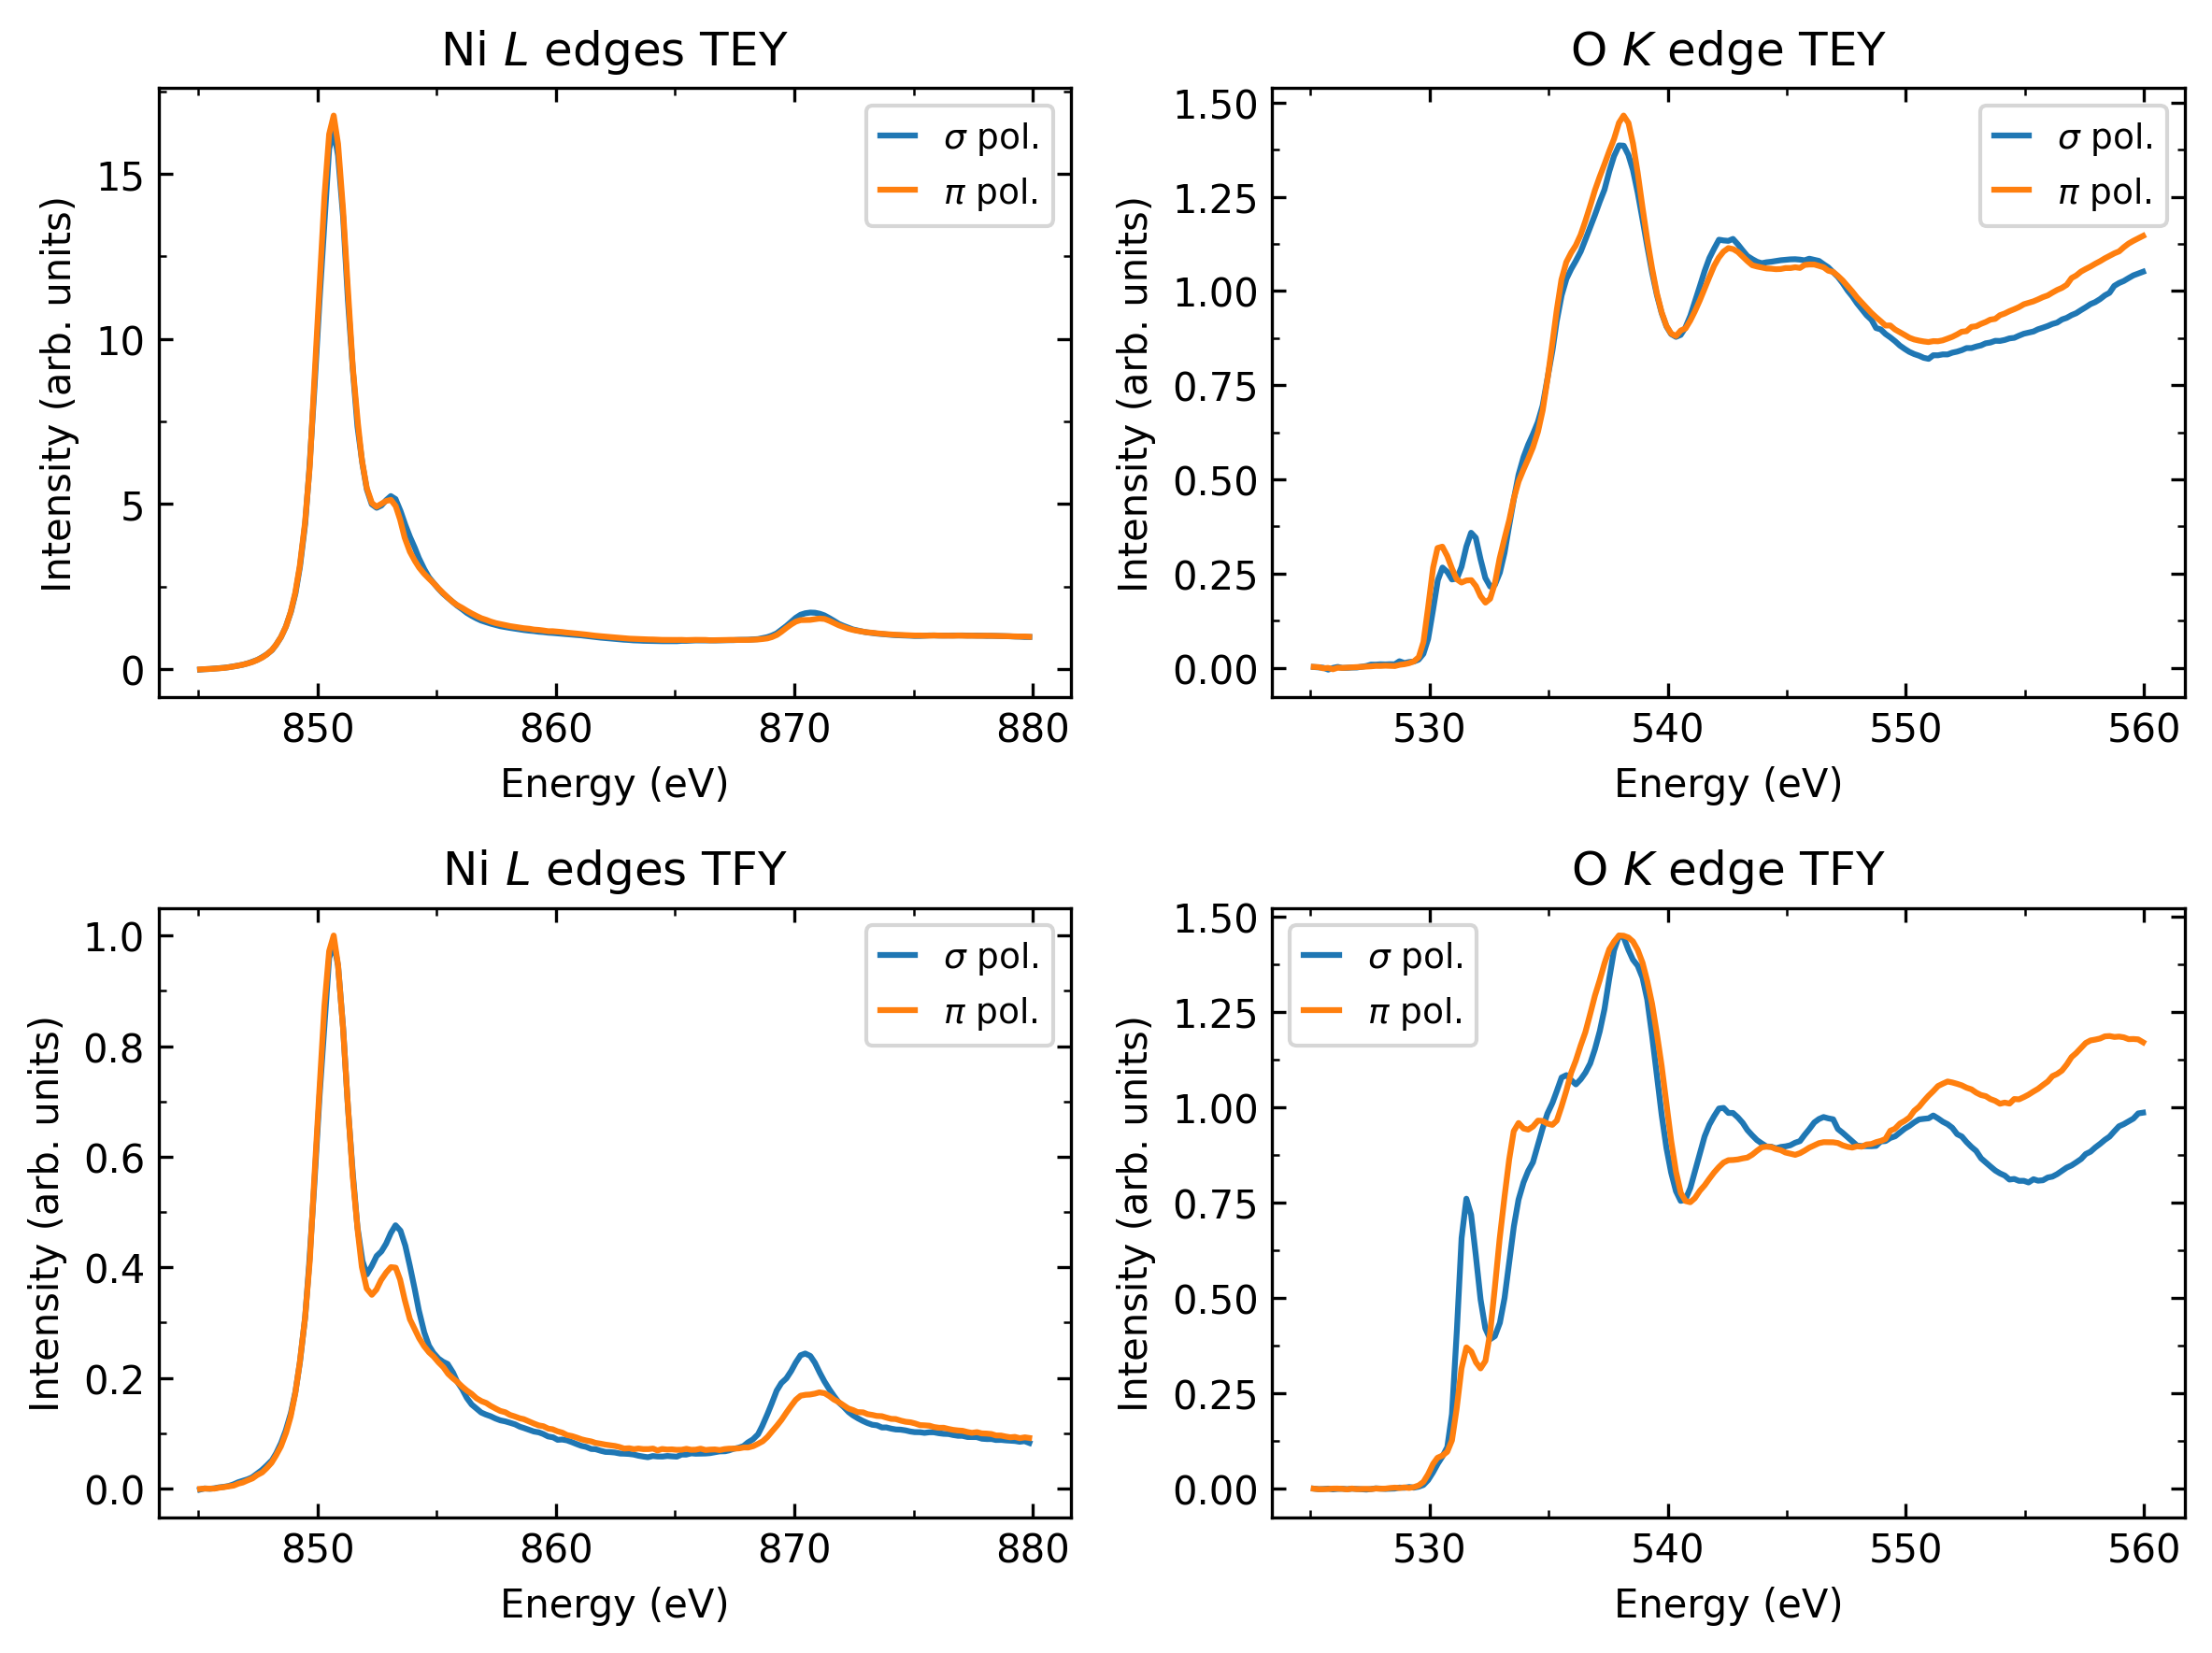

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), dpi=300)

plt.sca(axs.flatten()[0])
norm = nilv[nilv[:, 0] > 875.5, 1].mean()
plt.plot(nilv[:, 0], nilv[:, 1]/norm, label=r"$\sigma$ pol.")
norm = nilh[nilh[:, 0] > 875.5, 1].mean()
plt.plot(nilh[:, 0], nilh[:, 1]/norm, label=r"$\pi$ pol.")
plt.title(r"Ni $L$ edges TEY")

plt.sca(axs.flatten()[1])
plt.plot(olv[:, 0], olv[:, 1], label=r"$\sigma$ pol.")
plt.plot(olh[:, 0], olh[:, 1], label=r"$\pi$ pol.")
plt.title(r"O $K$ edge TEY")

plt.sca(axs.flatten()[2])
norm = nilv[nilv[:, 0] > 875.5, 2].mean()
plt.plot(nilv[:, 0], nilv[:, 2], label=r"$\sigma$ pol.")
norm = nilh[nilh[:, 0] > 875.5, 2].mean()
plt.plot(nilh[:, 0], nilh[:, 2], label=r"$\pi$ pol.")
plt.title(r"Ni $L$ edges TFY")

plt.sca(axs.flatten()[3])
plt.plot(olv[:, 0], olv[:, 2], label=r"$\sigma$ pol.")
plt.plot(olh[:, 0], olh[:, 2], label=r"$\pi$ pol.")
plt.title(r"O $K$ edge TFY")

for ax in axs.flatten():
    plt.sca(ax)
    add_minor_ticks(ax)
    plt.tick_params(direction="in", which='both', top=True, right=True)
    plt.ylabel("Intensity (arb. units)")
    plt.xlabel("Energy (eV)")
    plt.legend(fontsize=9, handlelength=1)


plt.tight_layout()

## Ni $L_3$ RIXS map

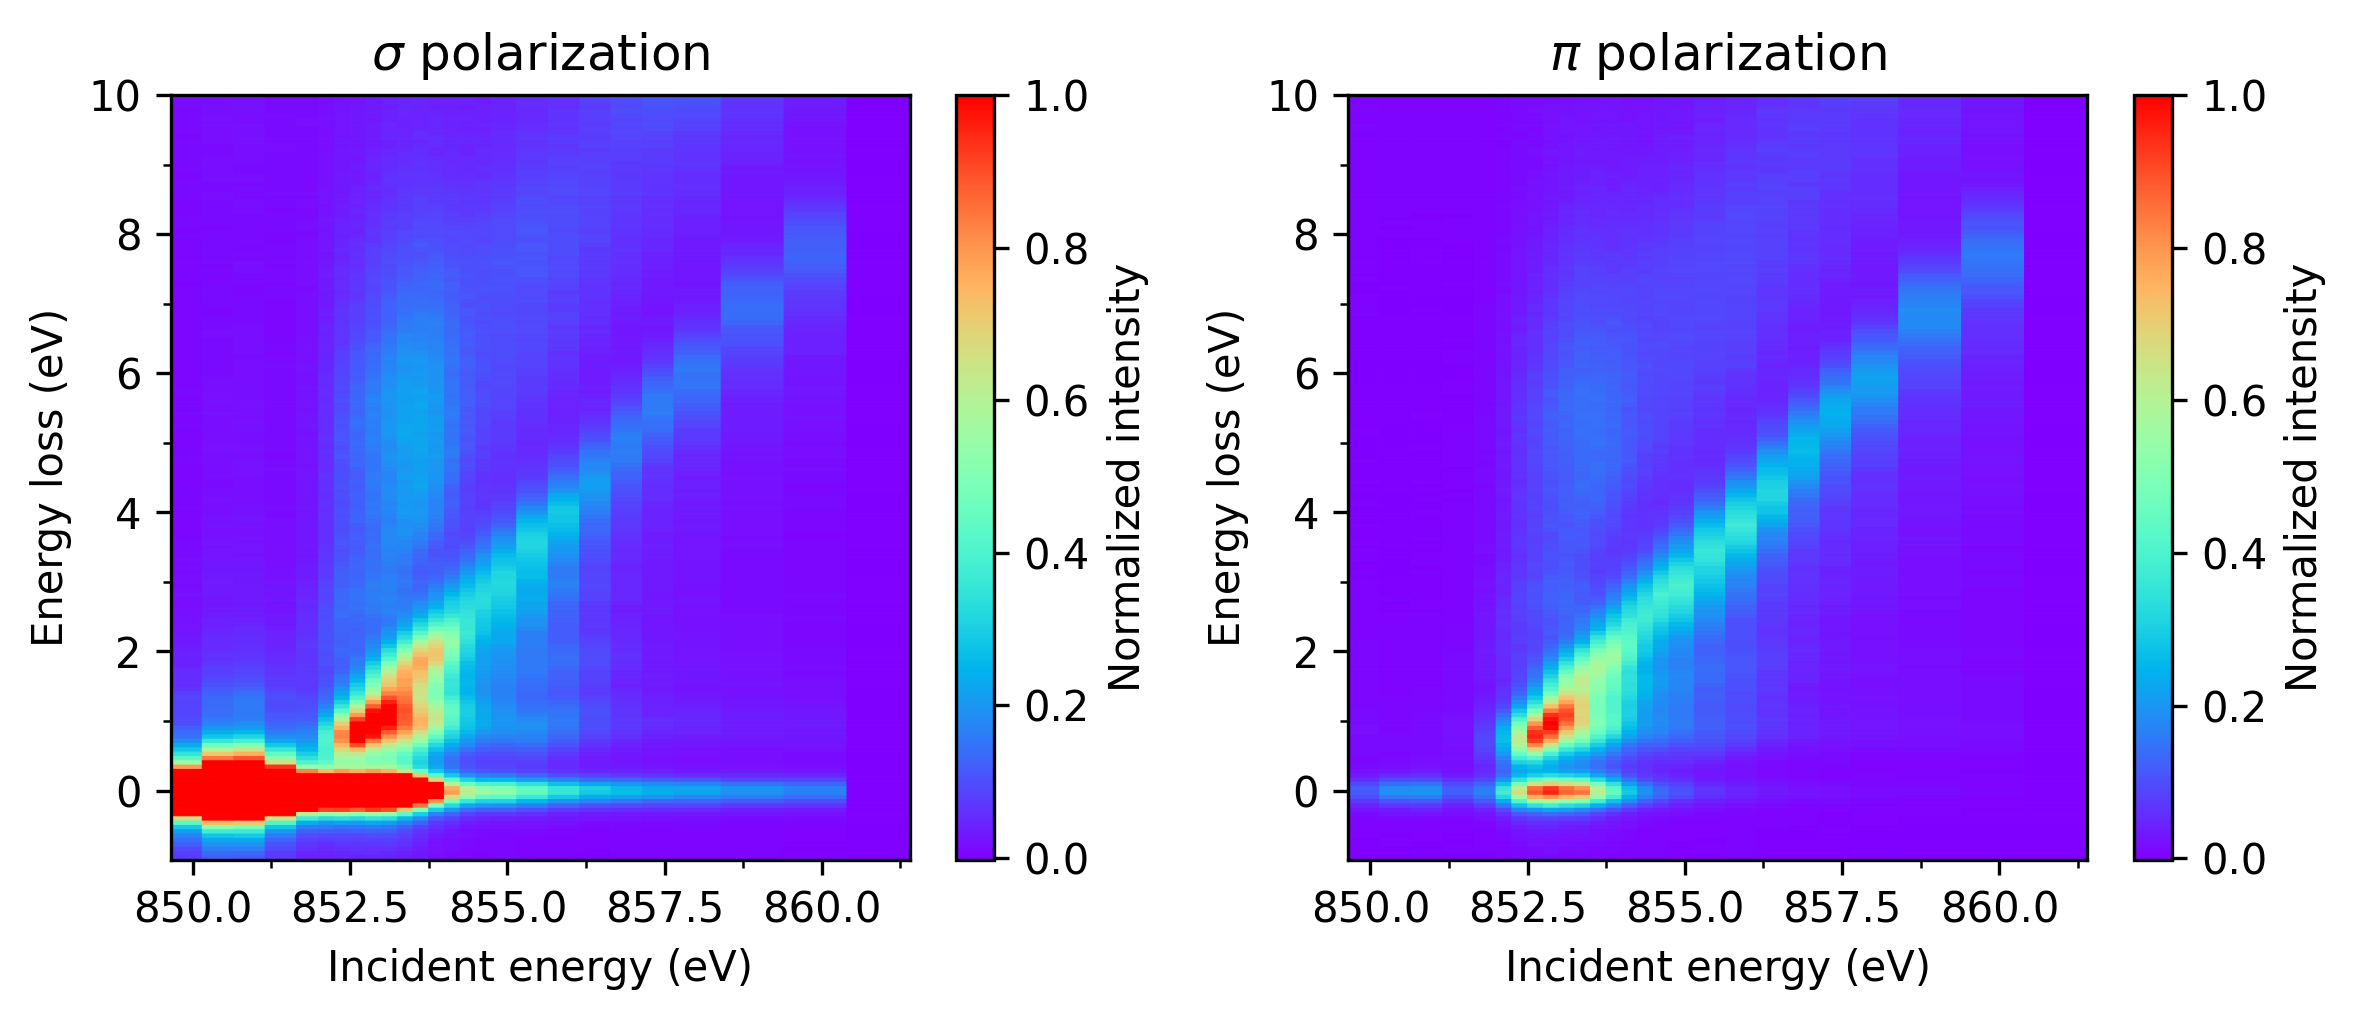

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3.5), dpi=300)

norm = np.array(pi["l3map"]["rixs"])[:, pi["l3map"]["eloss"] > 0.5].max()

for pol, ax in zip([sig["l3map"], pi["l3map"]], axs):
    plt.sca(ax)
    x, y = np.meshgrid(pol["ein"], pol["eloss"])
    z = np.array(pol["rixs"]).transpose()/norm

    plt.pcolor(x, y, z, cmap='rainbow', edgecolors='face', vmax=1)
    plt.ylim(-1,10)
    cax = plt.colorbar(label="Normalized intensity")
    plt.xlabel("Incident energy (eV)")
    plt.ylabel("Energy loss (eV)")
    add_minor_ticks(ax)

axs[1].set_title(r"$\pi$ polarization")
axs[0].set_title(r"$\sigma$ polarization")
plt.tight_layout()
plt.savefig("La4Ni3O8.pdf", dpi=600)

## Ni $L_2$ RIXS map

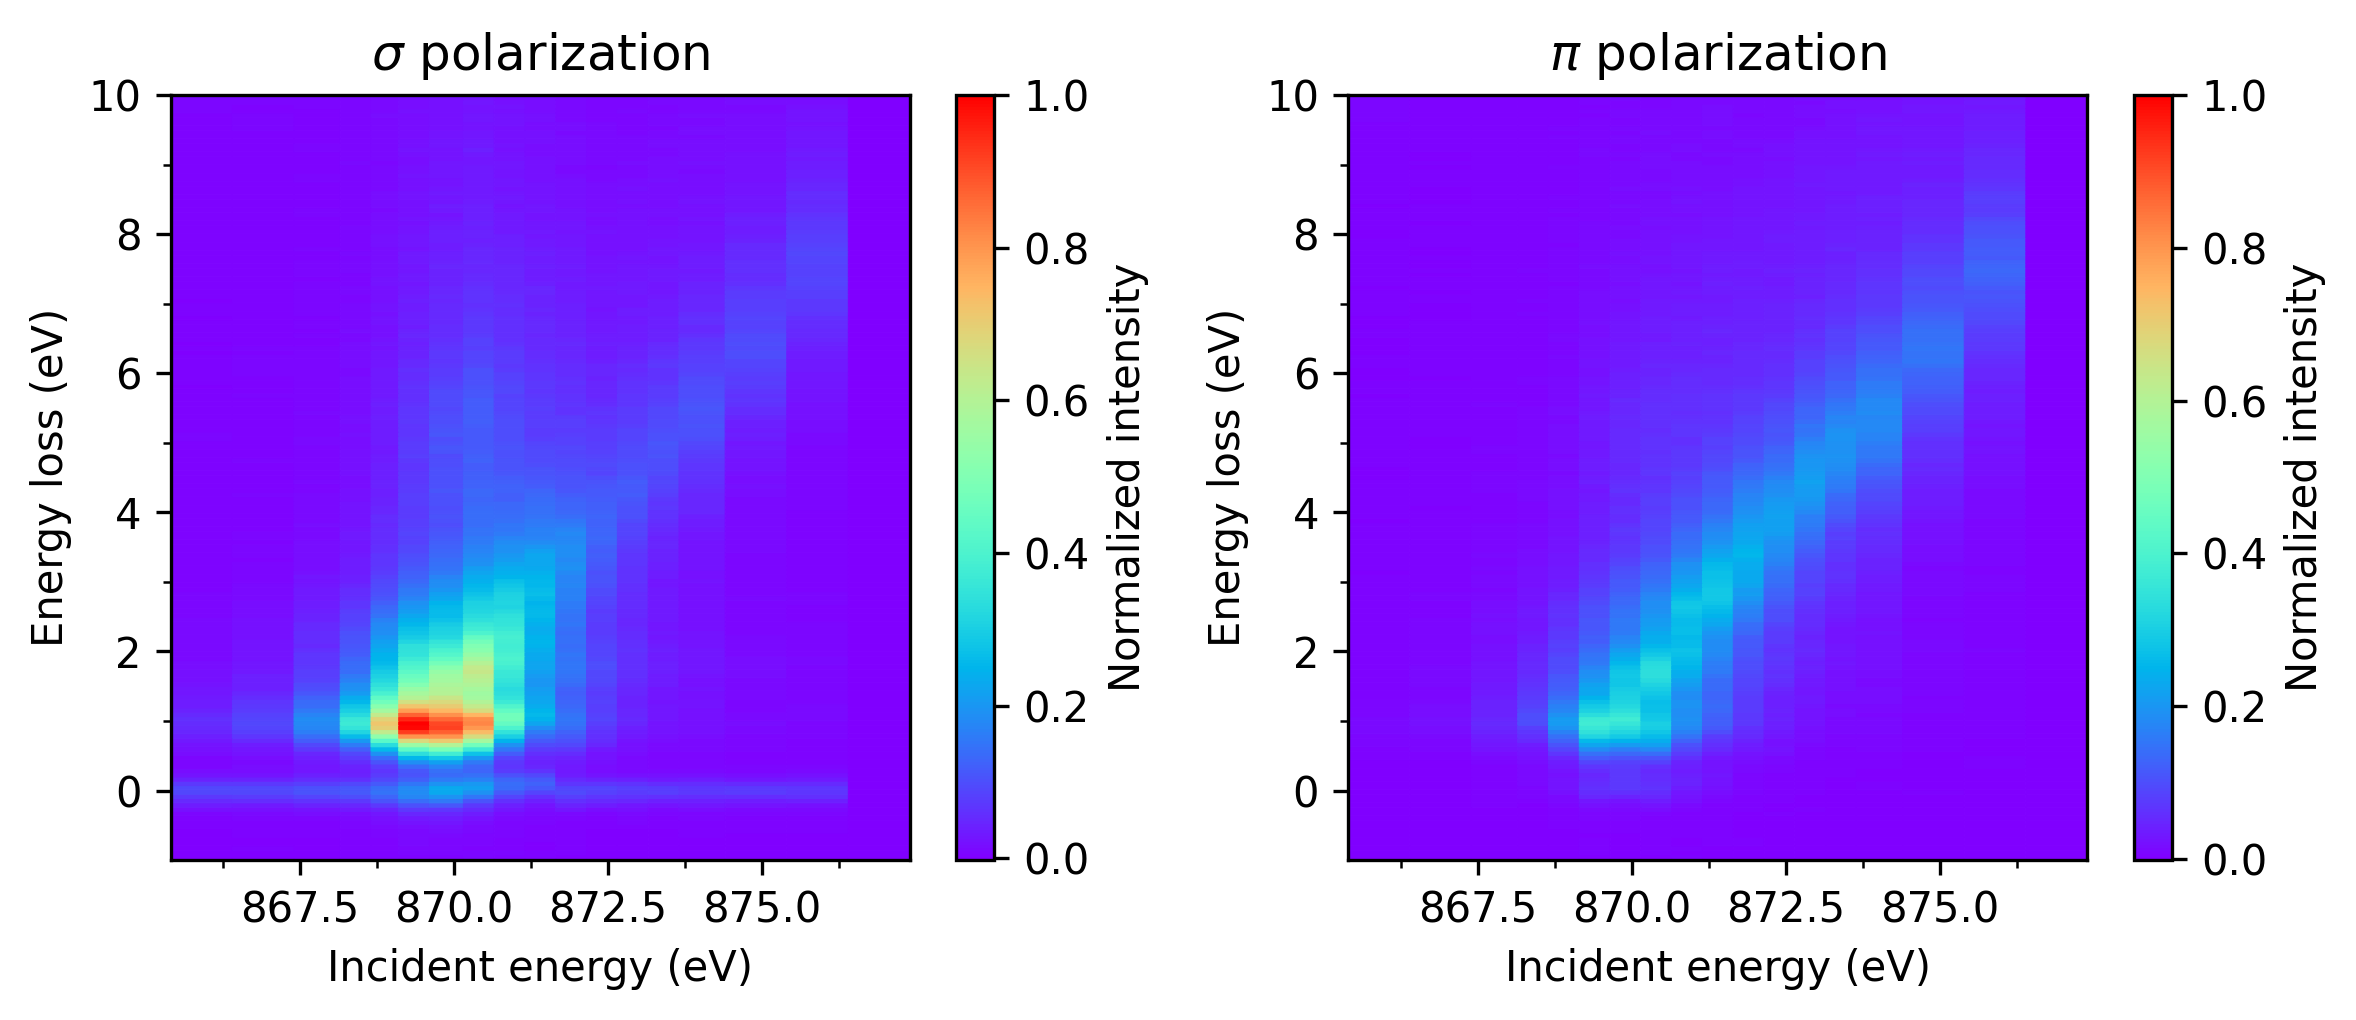

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3.5), dpi=300)

norm = np.array(sig["l2map"]["rixs"])[:, sig["l2map"]["eloss"] > 0.5].max()

for pol, ax in zip([sig["l2map"], pi["l2map"]], axs):
    plt.sca(ax)
    x, y = np.meshgrid(pol["ein"], pol["eloss"])
    z = np.array(pol["rixs"]).transpose()/norm

    plt.pcolor(x, y, z, cmap='rainbow', edgecolors='face', vmax=1)
    plt.ylim(-1,10)
    cax = plt.colorbar(label="Normalized intensity")
    plt.xlabel("Incident energy (eV)")
    plt.ylabel("Energy loss (eV)")
    add_minor_ticks(ax)
    

axs[0].set_title(r"$\sigma$ polarization")
axs[1].set_title(r"$\pi$ polarization")
plt.tight_layout()

## Ni $L_{3, 2}$ RIXS linecuts

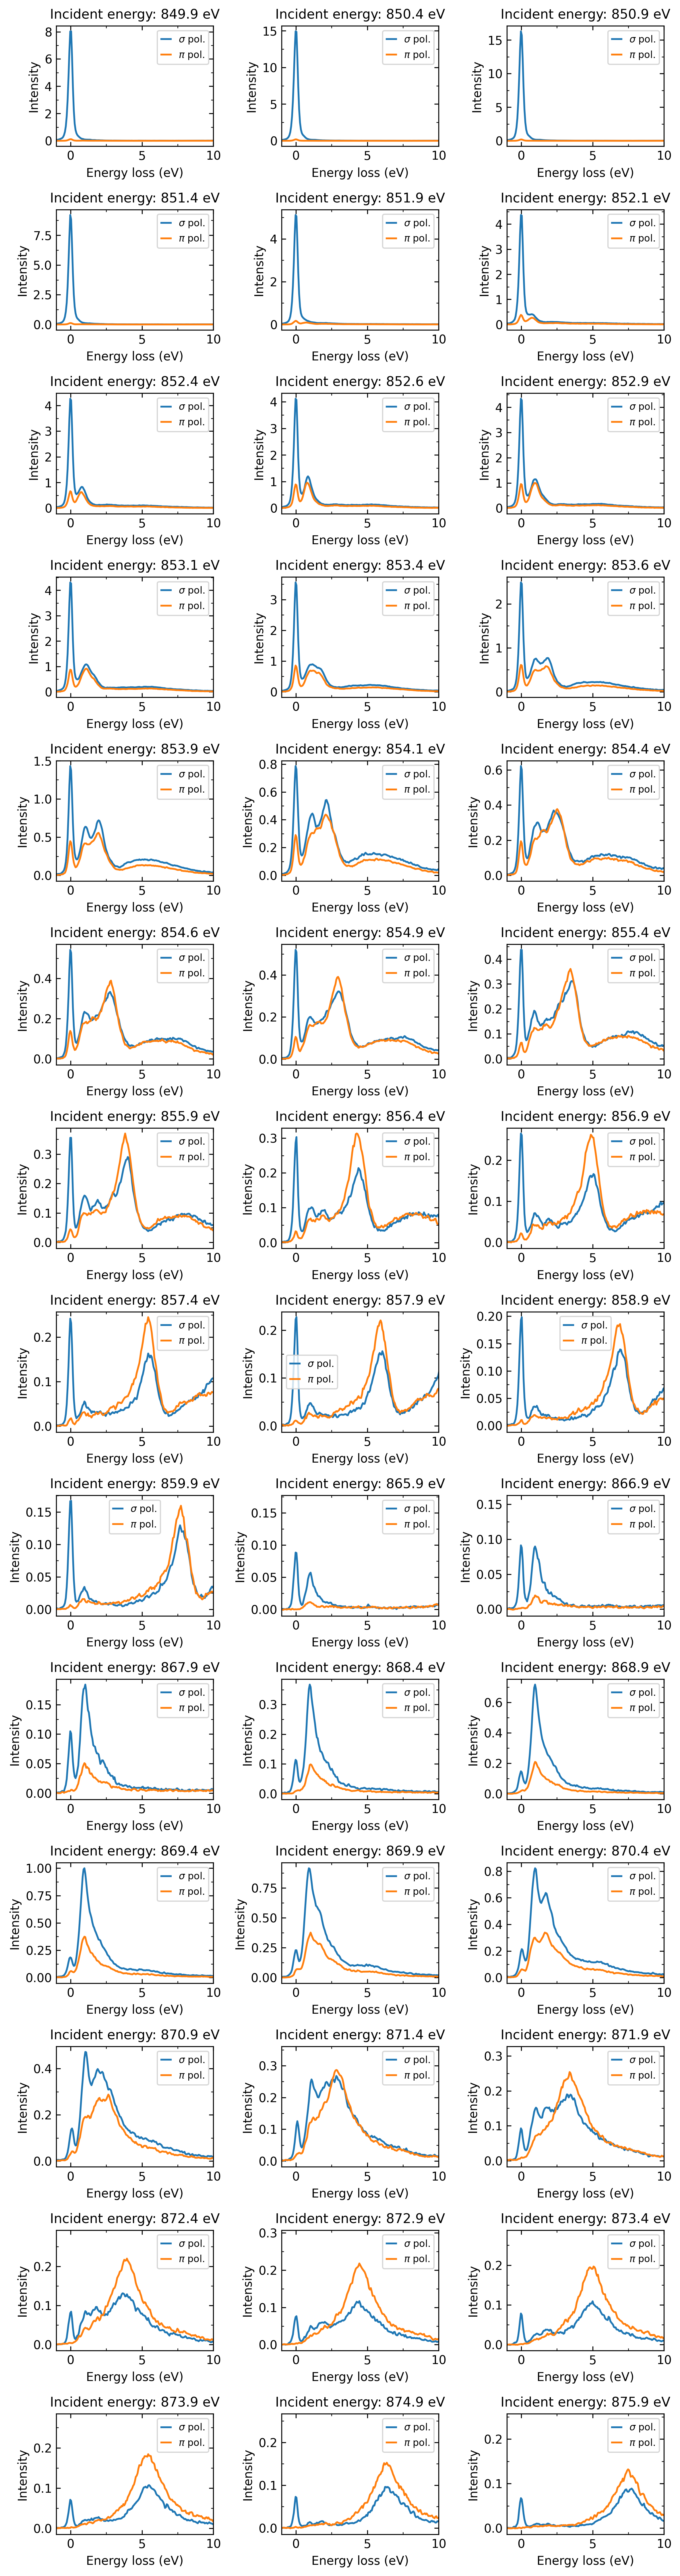

In [8]:
fig, axs = plt.subplots(14, 3, figsize=(8, 30), dpi=300)

energies = list(pi.keys())
energies.remove("l3map")
energies.remove("l2map")
energies.remove(860.9)
energies.remove(876.9)

l3norm = np.array(pi["l3map"]["rixs"])[:, pi["l3map"]["eloss"] > 0.5].max()
l2norm = np.array(sig["l2map"]["rixs"])[:, sig["l2map"]["eloss"] > 0.5].max()

for i, (ein, ax) in enumerate(zip(energies, axs.flatten())):
    plt.sca(ax)

    if ein < 865:
        plt.plot(sig[ein][:, 0], sig[ein][:, 1]/l3norm, label=r"$\sigma$ pol.")
        plt.plot(pi[ein][:, 0], pi[ein][:, 1]/l3norm, label=r"$\pi$ pol.")
    else:
        sein = ein if ein != 869.4 else 869.3
        plt.plot(
            sig[sein][:, 0],
            sig[sein][:, 1]/l2norm,
            label=r"$\sigma$ pol."
        )
        plt.plot(
            pi[ein][:, 0],
            pi[ein][:, 1]/l2norm,
            label=r"$\pi$ pol."
        )
    
    plt.xlim(-1, 10)
    plt.ylabel("Intensity")
    plt.xlabel("Energy loss (eV)")
    plt.title(f"Incident energy: {ein} eV", fontsize=11)
    plt.tick_params(direction="in", which="both", top=True, right=True)
    plt.legend(fontsize=8, handlelength=1)
    add_minor_ticks(ax)

plt.tight_layout()

## Ni $L_2$ temperature dependence 

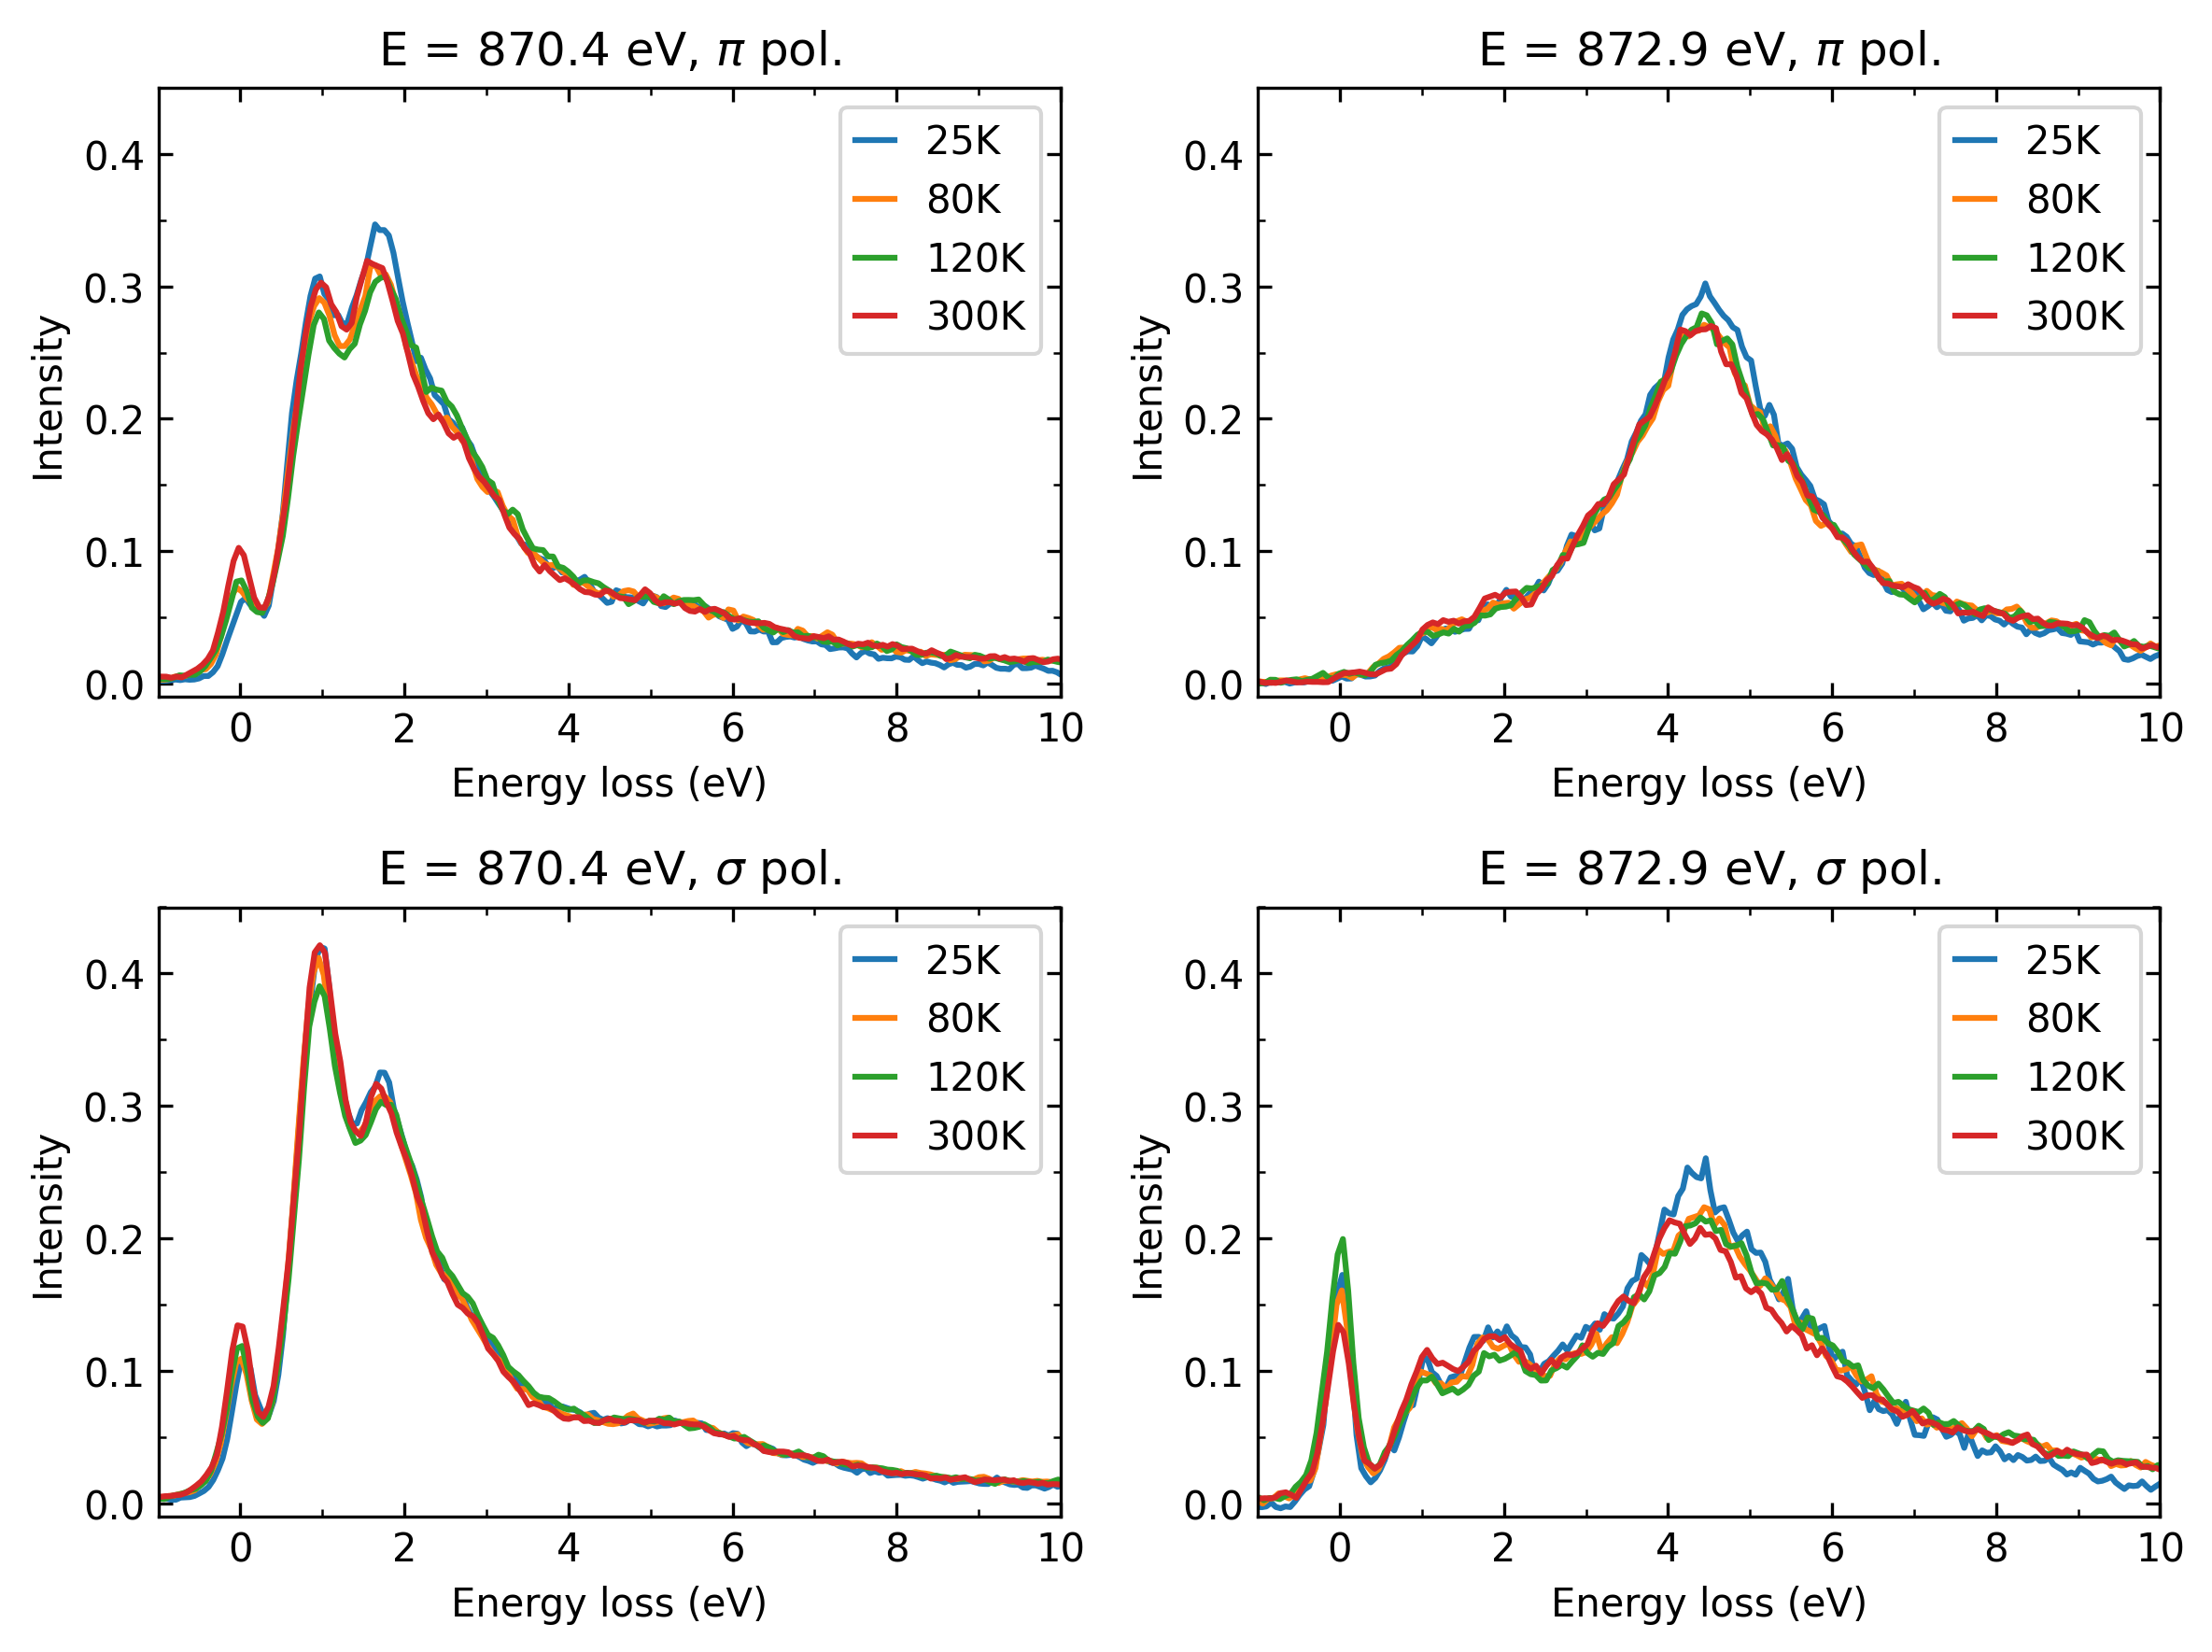

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), dpi=300)

pols = tdep.index.get_level_values("pol").unique()
energies = np.sort(tdep.index.get_level_values("energy").unique())
temperatures = np.sort(tdep.index.get_level_values("temperature").unique())

for (pol, energy), ax in zip(product(pols, energies), axs.flatten()):
    plt.sca(ax)
    for temperature in temperatures:
        if temperature < 302:
            scan = tdep.loc[(pol, temperature, energy)]["data"]

            index = (scan[:, 0] < -5) & (scan[:, 0] > -40)
            bkg = np.poly1d(
                np.polyfit(scan[index, 0], scan[index, 1], 1)
            )(scan[:, 0])

            index = (scan[:, 0] > 0.25) & (scan[:, 0] < 12)
            norm = np.trapz(scan[index, 1] - bkg[index], scan[index, 0])
            plt.plot(scan[:, 0], (scan[:, 1] - bkg)/norm, label=f"{temperature}K")
            add_minor_ticks(ax)

    plt.legend(handlelength=1)
    plt.xlim(-1, 10)
    plt.tick_params(direction="in", which="both", top=True, right=True)
    plt.ylim(-0.01, 0.45)
    plt.ylabel("Intensity")
    plt.xlabel("Energy loss (eV)")
    plabel = r"$\sigma$ pol." if pol == "sigma" else r"$\pi$ pol."
    plt.title(r"E = {} eV, {}".format(energy, plabel))

plt.tight_layout()